# Oxygen Isotope Tracer: Science

This notebook is for investigating the characteristics of the oxygen isotope tracer data, built in the "case_study" notebook on the Arctic Ocean Reanalysis

In [2]:
import yaml

from netcdf_climate_analysis_funcs import climdata, multiplot, timeseriesplot, climatology, anomaly
from netcdf_climate_analysis_funcs.small_funcs import timeseg, weighted_average

from data_plotting import ArcticPlotter, OxygenIsotopePlots

with open("config.yaml", "r") as f:
    CONFIG = yaml.safe_load(f)

/noc/users/acable/miniforge3/envs/AISIT/lib/python3.13/site-packages/symfit/core/printing.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## 1. Load the data

In [3]:
oxy_iso = climdata(CONFIG["arctic_reanalysis_oxy"], var="oxygen_isotope_tracer")

In [4]:
oxy_iso_clim = climatology(oxy_iso, "month")
oxy_iso_anom = anomaly(oxy_iso, oxy_iso_clim, "month")

In [5]:
oxy_iso_tseries = weighted_average(oxy_iso, "longitude", "latitude")
oxy_iso_clim_tseries = weighted_average(oxy_iso_clim, "longitude", "latitude")
oxy_iso_anom_tseries = weighted_average(oxy_iso_anom, "longitude", "latitude")

# 2. Simple Plots

In [11]:
oxy_pos_aoo = timeseg(oxy_iso, "time", ("1994-01-01", "1994-12-01"))
oxy_neg_aoo = timeseg(oxy_iso, "time", ("2007-01-01", "2007-12-01"))
oxy_2019 = timeseg(oxy_iso, "time", ("2019-01-01", "2019-12-01"))

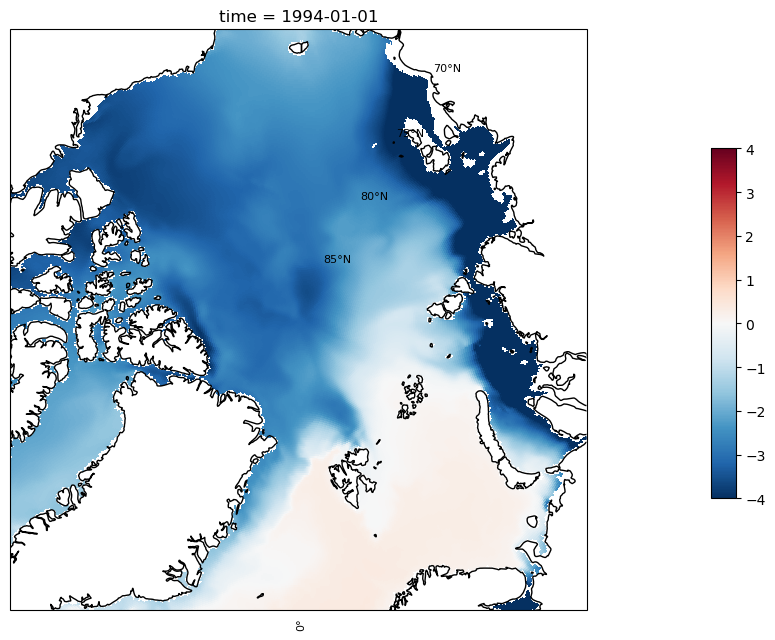

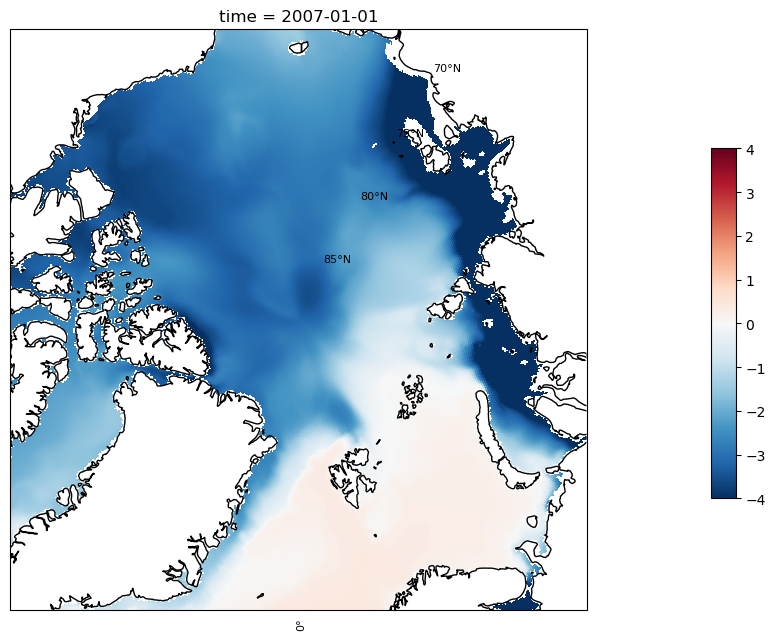

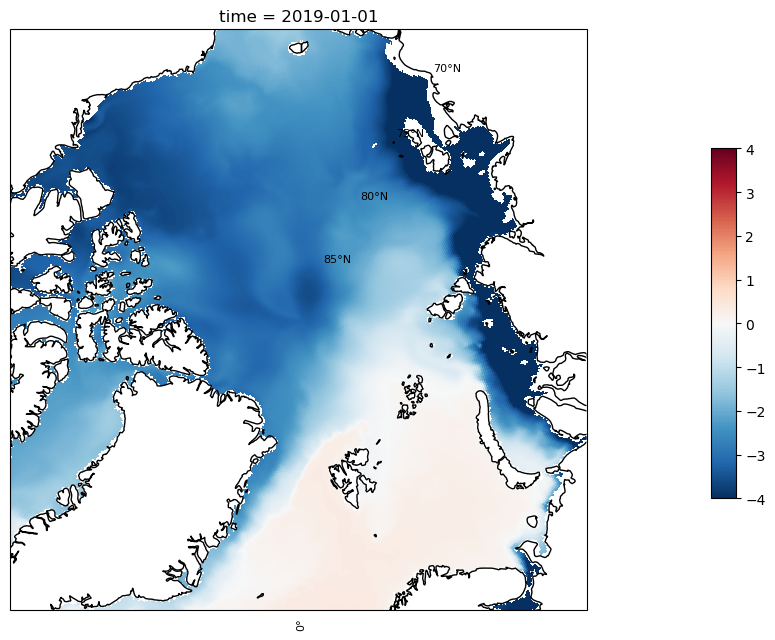

In [12]:
fig, ax, p = multiplot(oxy_pos_aoo.isel(time=0), vmin=-4, vmax=4, cmap="RdBu_r", map_type="NorthPolarStereo", xyreg=(False,(70,90)))
fig, ax, p = multiplot(oxy_neg_aoo.isel(time=0), vmin=-4, vmax=4, cmap="RdBu_r", map_type="NorthPolarStereo", xyreg=(False,(70,90)))
fig, ax, p = multiplot(oxy_2019.isel(time=0), vmin=-4, vmax=4, cmap="RdBu_r", map_type="NorthPolarStereo", xyreg=(False,(70,90)))

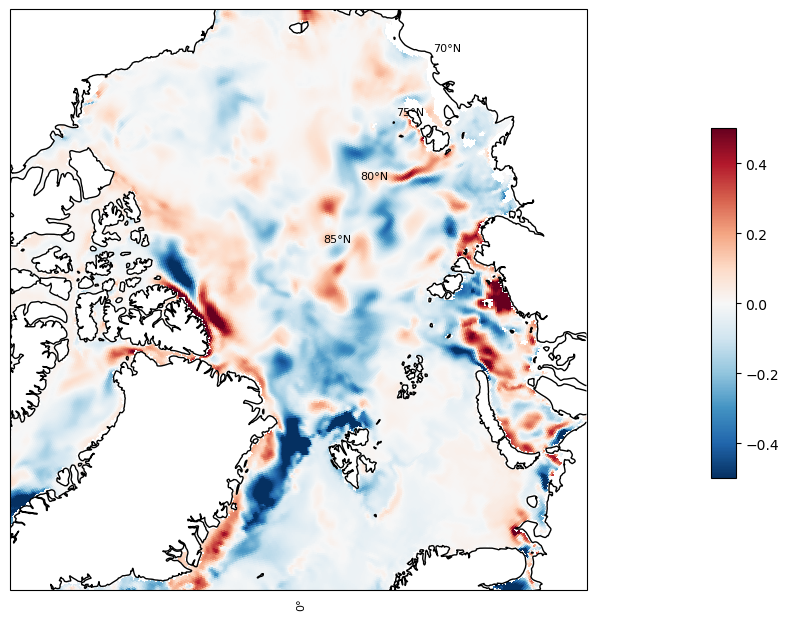

In [8]:
fig, ax, p = multiplot(oxy_pos_aoo.isel(time=0) - oxy_neg_aoo.isel(time=0), vmin=-.5, vmax=.5, cmap="RdBu_r", map_type="NorthPolarStereo", xyreg=(False,(70,90)))

(<Figure size 1500x700 with 1 Axes>,
 <Axes: xlabel='time', ylabel='oxygen isotope tracer anomaly'>,
 [<matplotlib.lines.Line2D at 0x7f3a02239090>])

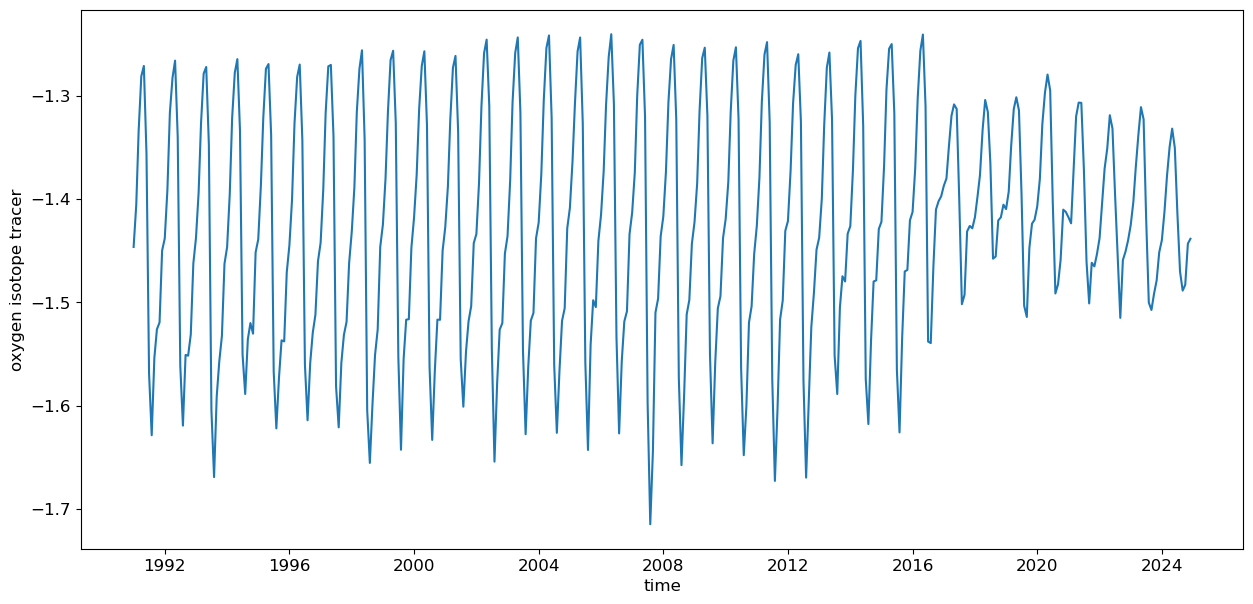

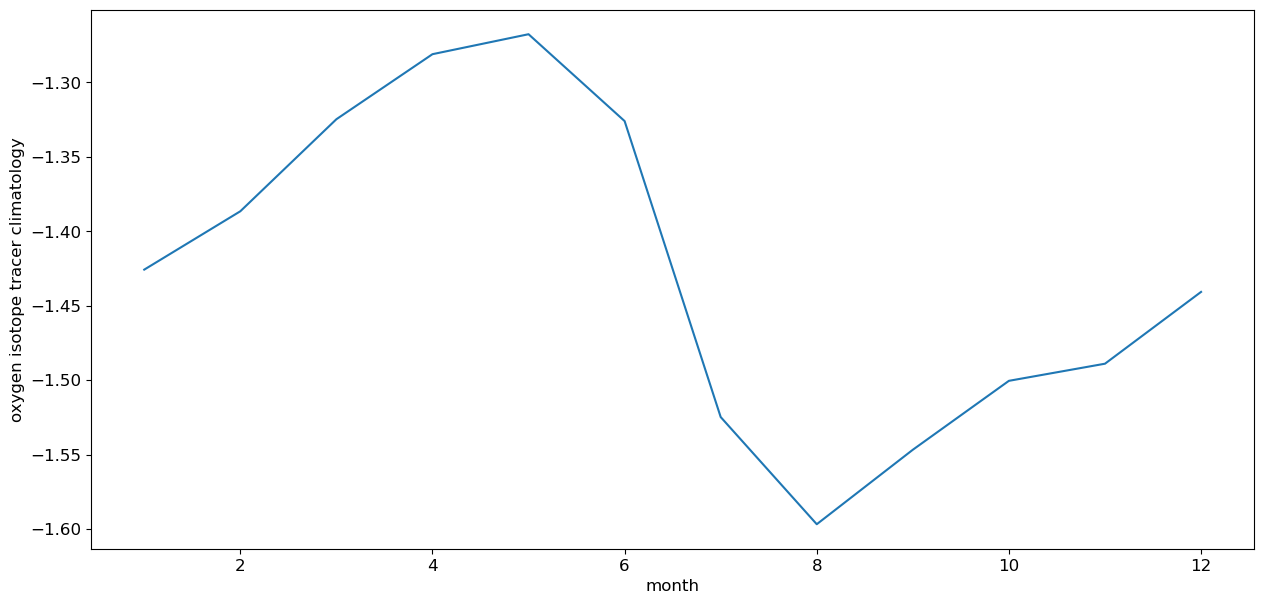

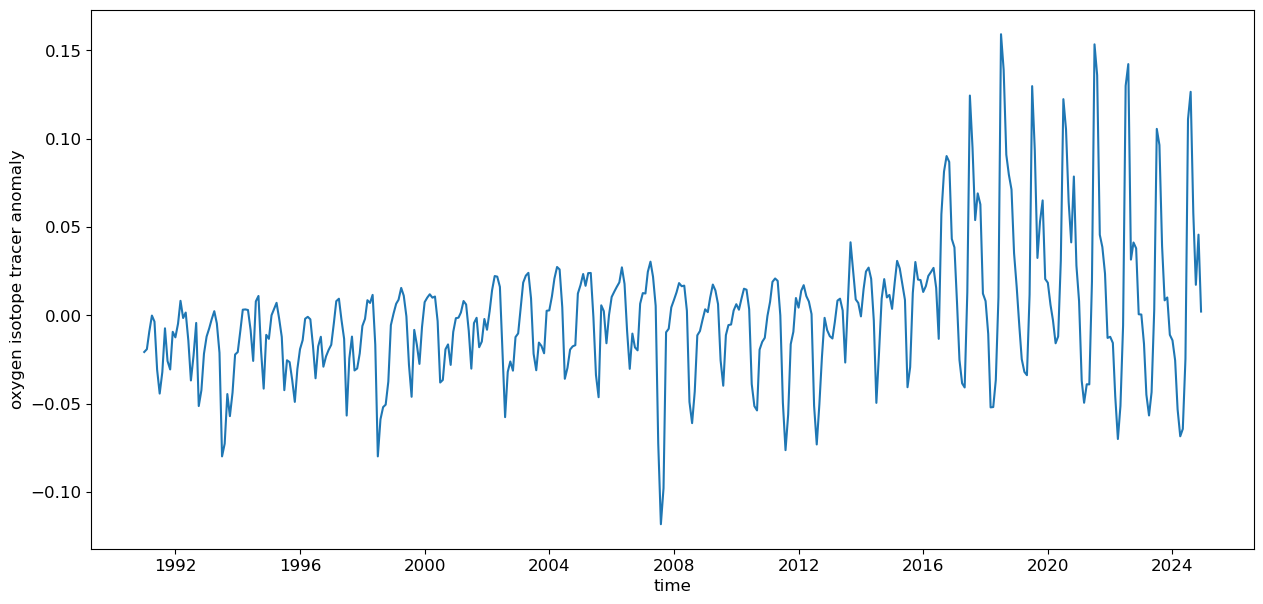

In [9]:

timeseriesplot(oxy_iso_tseries, "oxygen isotope tracer", "time")
timeseriesplot(oxy_iso_clim_tseries, "oxygen isotope tracer climatology", "month")
timeseriesplot(oxy_iso_anom_tseries, "oxygen isotope tracer anomaly", "time")